# Content and Objective

- Simulation of probability of birthdays happening on the same day of the year (neglecting year of birth, leap years)
- Birthdays of groups of according size are sampled and checked for doubles

# Import

In [1]:
# importing
import numpy as np

import time

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=0)

matplotlib.rc('figure', figsize=(18, 6) )

In [3]:
start = time.time()

# Parameters and Analytical Result

In [4]:
# max. group size in simulation and theory
N_max = 110

# group sizes used for simulation
N_sim = np.arange( 10, N_max, 10 )

# group sizes for theoretical results
N = np.arange( 1, N_max )

# theoretical value   
Pr_theo = np.zeros( len(N)  )

for ind_n, val_n in enumerate( N ):
    Pr_theo[ ind_n ] = 1 - np.prod( np.arange( 365. - val_n + 1 , 365 ) / 365 )


# Simulation

In [5]:
# number of trials per group size
N_trials = int( 1e4 )

# initialize 
Pr_sim = np.zeros( len( N_sim ) )    

# loop for group sizes
for ind_n, val_n in enumerate( N_sim ):
    
    # initialize counters for multiple bithdays (hits) and number of trials (_n)
    hits = 0 

    # loop for realizations
    for _n in range( N_trials ):
        
        # get birthdays
        birthdays = np.random.randint(1, 366, size = val_n )

        # check double occurrences
        # NOTE: set( ) generates a set out of a list and thereby eliminates doubles
        if len( set( birthdays ) ) < val_n:
            hits += 1
            

    # estimate probability by relative frequency
    Pr_sim [ ind_n ] = hits / N_trials

# Plotting

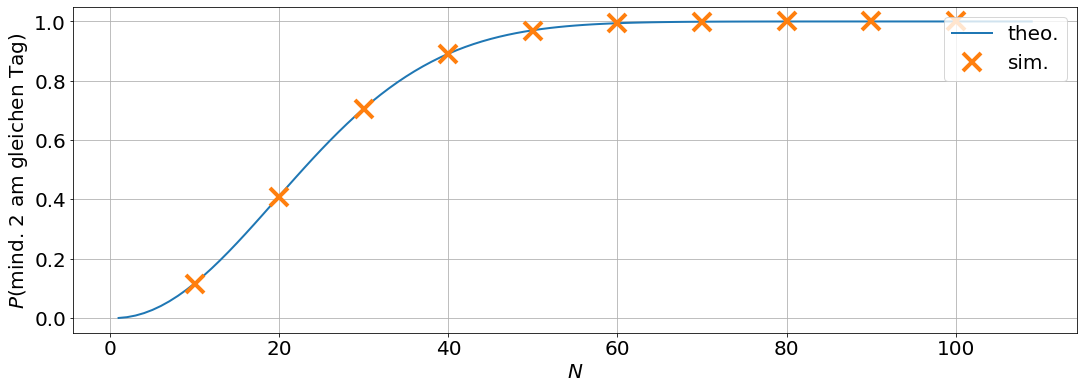

In [6]:
plt.plot( N, Pr_theo, linewidth=2.0, label='theo.')
plt.plot( N_sim, Pr_sim, 'x', mew=4, ms=18, linewidth=2.0, label='sim.')    

plt.xlabel('$N$')
plt.ylabel('$P($' + 'mind. 2 am gleichen Tag' +'$)$')
plt.grid( True )
plt.legend( loc = 'upper right' )

In [7]:
print(time.time()-start)

2.739107370376587
